In [4]:
import nltk
from collections import Counter
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

/Users/matthewmitchell/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pwd

'/Users/matthewmitchell/Documents'

In [5]:
nltk.download ('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/matthewmitchell/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [6]:
word_list = nltk.corpus.words.words ()

In [9]:
five_letter_words = [w for w in word_list if len(w)==5]

In [14]:
def letterfy(word_list) :
    return [element.lower() for w in word_list for element in list(set(w))]

## All Words 

In [126]:
words_df = pd.DataFrame(five_letter_words)
words_df.columns = ['word']
for i in range (5):
    words_df['Letter{}'.format(i+1)] = words_df['word'].apply(lambda x: x[i])
print(len(words_df))
words_df = words_df[words_df.Letter1 == words_df.Letter1.str.lower()]
print(len(words_df))
words_df

10422
8689


,word,Letter1,Letter2,Letter3,Letter4,Letter5
0,aalii,a,a,l,i,i
2,abaca,a,b,a,c,a
3,aback,a,b,a,c,k
4,abaff,a,b,a,f,f
5,abaft,a,b,a,f,t
...,...,...,...,...,...,...
10417,white,w,h,i,t,e
10418,woman,w,o,m,a,n
10419,wound,w,o,u,n,d
10420,wrong,w,r,o,n,g


In [79]:
def generate_word_query(L, isIn=True):
    if isIn:
        symbol = "="
        conjunction = "or"
    else:
        symbol = "!"
        conjunction = "and"
    query = "and (Letter1 {}= '{}' ". format (symbol, L)
    for i in range (2,6) :
        query+= "{} Letter{} {}='{}' ".format(conjunction, i, symbol, L)
    query += ")"
    return query

In [140]:
def clueUpdate(guessword, response):
    query = ""
    for idx, letter in enumerate(guessword):
        letterJudgement = response[idx]
        if letterJudgement == "G":
            query += "and (Letter{}= '{}')".format(idx+1, letter)
        elif letterJudgement == "Y":
            query += "and (Letter{} != '{}')".format(idx+1, letter)
            query += generate_word_query(letter)
        elif letterJudgement == "R":
            query += generate_word_query(letter, isIn=False)
        else:
            assert False, "Please ensure response is a string of RGY: GYGRY"
    query = query.strip("and ")
    temp = temp.query(query)

In [80]:
def generate_clueDeduction_query (guessword, possibleWord):
    query = ""
    for idx, letter in enumerate(guessword):
        #Does this letter match prospectword?
        if letter == possibleWord[idx]:
            #print(idx, Letter, possiblewordfidx)) #for debugging
            query += "and (Letter{} == '{}')".format(idx+1, letter)
        elif letter in possibleWord:
            query += "and (Letter{} != '{}')".format(idx+1, letter)
            query += generate_word_query(letter)
        else:
            query += generate_word_query(letter, isIn=False)
    query = query.strip("and ")
    return query

In [108]:
temp

,word,Letter1,Letter2,Letter3,Letter4,Letter5
165,solve,o,o,o,o,o
369,loser,o,o,o,o,o
507,spiel,p,p,p,p,p
533,spell,p,p,p,p,p
535,louse,o,o,o,o,o
606,loose,o,o,o,o,o
660,smile,m,m,m,m,m
1039,shell,h,h,h,h,h
1091,smell,m,m,m,m,m
1160,shelf,h,h,h,h,h


In [109]:
generate_clueDeduction_query('pulse', 'pulse')

"(Letter1 == 'p')and (Letter2 == 'u')and (Letter3 == 'l')and (Letter4 == 's')and (Letter5 == 'e')"

In [107]:
temp.query(generate_clueDeduction_query('pulse', 'pulse'))

,word,Letter1,Letter2,Letter3,Letter4,Letter5


In [81]:
def simulate(temp, guessWord):
    #for each potential word, simulate the remaining words possible given the guess word
    haystacks =[]
    for possibleWord in temp.word:
        #Return clue from word
        #For Letter in, guessiond:
        haystacks.append(len(temp.query(generate_clueDeduction_query(guessWord, possibleWord))))
    return haystacks

In [100]:
def return_best_words(guessList, toPrint=True):
    guessList = list(guessList)
    scores = []
    words_and_scores = []
    for word in guessList:
        haystacks = simulate(temp, word)
        score = np.mean(haystacks)
        scores.append(score)
        words_and_scores.append((word, score))
        if toPrint:
            print(word, score)
    min_idx = np.argmin(scores)
    best_score = scores[min_idx]
    best_word = guessList[min_idx]
    if toPrint:
        print ("In\n")
        print ("Best score: {} From word: {}".format(best_score, best_word))
    words_and_scores = sorted(words_and_scores, key=lambda x: x[1])
    return words_and_scores

## NY Times 2309 Word Update

In [83]:
solution_words = []
with open('solutions_nyt.txt') as f:
    for line in f.readlines():
        for w in line.split(","):
            solution_words.append(w.strip().strip('"'))
print(len(solution_words), solution_words[:5], solution_words[-5:])

2309 ['cigar', 'rebut', 'sissy', 'humph', 'awake'] ['judge', 'rower', 'artsy', 'rural', 'shave']


In [130]:
words_df = pd.DataFrame(solution_words)
words_df.columns = ['word']
for i in range(5):
    words_df['Letter{}'.format(i+1)] = words_df['word'].apply(lambda x: x[i])

print(len(words_df))
words_df

2309


,word,Letter1,Letter2,Letter3,Letter4,Letter5
0,cigar,c,i,g,a,r
1,rebut,r,e,b,u,t
2,sissy,s,i,s,s,y
3,humph,h,u,m,p,h
4,awake,a,w,a,k,e
...,...,...,...,...,...,...
2304,judge,j,u,d,g,e
2305,rower,r,o,w,e,r
2306,artsy,a,r,t,s,y
2307,rural,r,u,r,a,l


In [85]:
temp = words_df.copy()

## Simulate Best Starter Words

In [86]:
words_and_scores = return_best_words(temp.word.sample(500))
words_and_scores = sorted(words_and_scores, key=lambda x: x[1])
print(len(words_and_scores), words_and_scores[:5], words_and_scores[-5:])

rupee 357.7912516240797
wordy 488.8934603724556
climb 558.4556084885231
cliff 717.3633607622347


KeyboardInterrupt: 

In [89]:
letter_frequency = Counter(letterfy(words_df.word))
letter_frequency = pd.DataFrame.from_dict(letter_frequency, orient='index')
letter_frequency.columns = ['count']
letter_frequency = letter_frequency.sort_values(by='count', ascending=False)
letter_frequency.head()

,count
e,1053
a,906
r,835
o,672
t,667


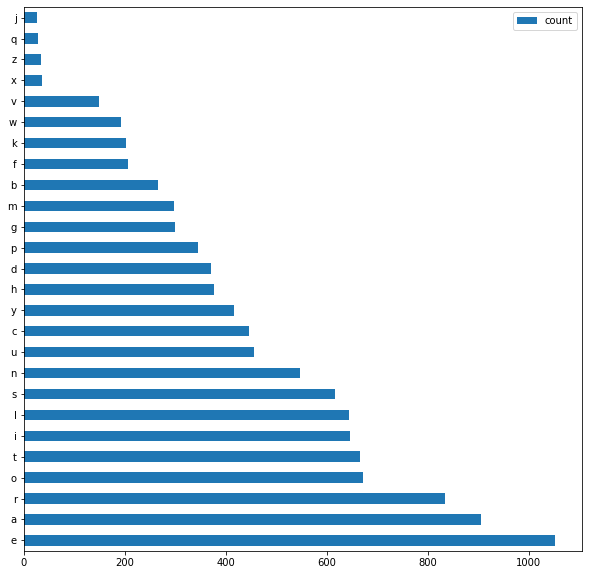

In [92]:
letter_frequency.plot(kind='barh', figsize=(10,10))

In [93]:
letter_frequency.index[:4]

Index(['e', 'a', 'r', 'o'], dtype='object')

In [95]:
sample_words = words_df.copy()
for letter in letter_frequency.index[:3]:
    sample_words = sample_words[sample_words.word.str.contains(letter)]
    print(len(sample_words))

1053
361
129


In [97]:
temp = words_df.copy().sample(600)

words_and_scores = return_best_words(sample_words)
words_and_scores = sorted(words_and_scores, key=lambda x: x[1])
print(len(words_and_scores), words_and_scores[:5], words_and_scores[-5:])

word 165.34333333333333


IndexError: string index out of range

## Daily Run

In [35]:
temp = words_df[(words_df.word.str.contains('a'))
                & (~words_df.word.str.contains('r'))
                & (~words_df.word.str.contains ('i'))
                & (~words_df.word.str.contains('s'))
                & (~words_df.word.str.contains( 'e'))
                & (words_df['Letter1'] == 'a')
                & (words_df['Letter2'] != 'r')
                & (words_df['Letter3'] != 'i')
                & (words_df['Letter4'] != 's')
                & (words_df['Letter5'] != 'e')]
print(len(temp), temp)

590         word Letter1 Letter2 Letter3 Letter4 Letter5
803    babby       a       a       a       a       a
805    baboo       a       a       a       a       a
806    Babua       a       a       a       a       a
807    babul       a       a       a       a       a
808    bacao       a       a       a       a       a
...      ...     ...     ...     ...     ...     ...
10175  zayat       a       a       a       a       a
10302  happy       a       a       a       a       a
10310  laugh       a       a       a       a       a
10316  match       a       a       a       a       a
10412  watch       a       a       a       a       a

[590 rows x 6 columns]


In [29]:
words_df.columns

Index(['word', ' Letter1', ' Letter2', ' Letter3', ' Letter4', ' Letter5'], dtype='object')

In [ ]:
words_df[(words.df.str.contains('e'))
        &((words.df.str.contains('i')))
        &(~words.df.str.contains('t'))
        &((words.df.str.contains('e')))]

## 10/22/22

In [141]:
temp = words_df.copy()
print(len(temp))

2309


In [142]:
print(len(temp))
clueUpdate('least','YYRYR')
print(len(temp))
temp

2309


UnboundLocalError: local variable 'temp' referenced before assignment

In [138]:
temp = temp[(temp.word.str.contains('l'))
                & (temp.word.str.contains('e'))
                & (~temp.word.str.contains ('a'))
                & (temp.word.str.contains('s'))
                & (~temp.word.str.contains( 't'))
                & (temp['Letter1'] != 'l')
                & (temp['Letter2'] != 'e')
                & (temp['Letter3'] != 'a')
                & (temp['Letter4'] != 's')
                & (temp['Letter5'] != 't')]
print(len(temp))

14


In [134]:
temp

,word,Letter1,Letter2,Letter3,Letter4,Letter5
165,solve,s,o,l,v,e
507,spiel,s,p,i,e,l
533,spell,s,p,e,l,l
630,sleep,s,l,e,e,p
660,smile,s,m,i,l,e
691,slide,s,l,i,d,e
990,slime,s,l,i,m,e
1039,shell,s,h,e,l,l
1091,smell,s,m,e,l,l
1160,shelf,s,h,e,l,f


In [135]:
bestGuesses = return_best_words(temp.word)
bestGuesses[:5]

solve 5.857142857142857
spiel 2.4285714285714284
spell 2.2857142857142856
sleep 2.4285714285714284
smile 2.2857142857142856
slide 2.7142857142857144
slime 2.142857142857143
shell 3.0
smell 2.4285714285714284
shelf 3.7142857142857144
slope 2.4285714285714284
swell 3.0
slice 2.7142857142857144
sleek 3.4285714285714284
In

Best score: 2.142857142857143 From word: slime


[('slime', 2.142857142857143),
 ('spell', 2.2857142857142856),
 ('smile', 2.2857142857142856),
 ('spiel', 2.4285714285714284),
 ('sleep', 2.4285714285714284)]

In [115]:
temp

,word,Letter1,Letter2,Letter3,Letter4,Letter5
165,solve,o,o,o,o,o
369,loser,o,o,o,o,o
507,spiel,p,p,p,p,p
533,spell,p,p,p,p,p
535,louse,o,o,o,o,o
606,loose,o,o,o,o,o
660,smile,m,m,m,m,m
1039,shell,h,h,h,h,h
1091,smell,m,m,m,m,m
1160,shelf,h,h,h,h,h


In [102]:
temp = temp[(temp.word.str.contains('l'))
                & (temp.word.str.contains('e'))
                & (~temp.word.str.contains ('a'))
                & (temp.word.str.contains('s'))
                & (~temp.word.str.contains( 't'))
                & (temp['Letter1'] != 'l')
                & (temp['Letter2'] != 'e')
                & (temp['Letter3'] != 'a')
                & (temp['Letter4'] != 's')
                & (temp['Letter5'] != 't')]
print(len(temp))

holes 0.0
In

Best score: 0.0 From word: holes


[('holes', 0.0)]

In [103]:
return_best_words(['spent'])

spent 0.0
In

Best score: 0.0 From word: spent


[('spent', 0.0)]

In [106]:
simulate(temp, "pulse")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## 10/23/2022

In [147]:
temp = words_df.copy()
print(len(temp))

2309


In [148]:
temp = temp[(~temp.word.str.contains('l'))
                & (~temp.word.str.contains('e'))
                & (~temp.word.str.contains ('a'))
                & (~temp.word.str.contains('s'))
                & (~temp.word.str.contains( 't'))
                & (temp['Letter1'] != 'l')
                & (temp['Letter2'] != 'e')
                & (temp['Letter3'] != 'a')
                & (temp['Letter4'] != 's')
                & (temp['Letter5'] != 't')]
print(len(temp))

bestGuesses = return_best_words(temp.word)
bestGuesses[:5]

221
humph 33.35294117647059
mimic 34.276018099547514
pound 6.927601809954751
booby 25.552036199095024
ivory 11.805429864253394
round 6.411764705882353
civic 51.52488687782805
corny 7.361990950226244
fjord 17.579185520361992
dowry 11.099547511312217
boozy 24.131221719457013
duchy 11.968325791855204
groin 6.891402714932127
group 9.760180995475114
bring 10.67420814479638
rhino 8.122171945701357
conic 11.108597285067873
picky 15.850678733031675
unify 11.705882352941176
drink 9.760180995475114
proxy 14.049773755656108
prick 13.289592760180996
crimp 10.095022624434389
wrung 10.438914027149321
humor 10.46606334841629
robin 8.55656108597285
cynic 15.036199095022624
vivid 50.52036199095023
mourn 7.244343891402715
nymph 17.38914027149321
found 8.71945701357466
chunk 16.339366515837103
forgo 19.65158371040724
vouch 14.30316742081448
donor 11.018099547511312
primo 10.095022624434389
brink 12.493212669683258
hydro 10.610859728506787
roomy 13.04524886877828
bobby 31.56108597285068
cinch 20.266968325

[('round', 6.411764705882353),
 ('irony', 6.610859728506787),
 ('crony', 6.647058823529412),
 ('groin', 6.891402714932127),
 ('pound', 6.927601809954751)]

In [ ]:
dimor
rocky
frill
drill
stoic
rhino
mourn
chino
primo
whick


In [149]:
temp = temp[(~temp.word.str.contains('r'))
                & (~temp.word.str.contains('o'))
                & (temp.word.str.contains ('u'))
                & (~temp.word.str.contains('n'))
                & (~temp.word.str.contains( 'd'))
                & (temp['Letter1'] != 'r')
                & (temp['Letter2'] != 'o')
                & (temp['Letter3'] != 'u')
                & (temp['Letter4'] != 'n')
                & (temp['Letter5'] != 'd')]
print(len(temp))
temp

14


,word,Letter1,Letter2,Letter3,Letter4,Letter5
3,humph,h,u,m,p,h
422,buggy,b,u,g,g,y
508,mummy,m,u,m,m,y
597,quick,q,u,i,c,k
748,juicy,j,u,i,c,y
1203,puppy,p,u,p,p,y
1351,mucky,m,u,c,k,y
1570,puffy,p,u,f,f,y
1643,fuzzy,f,u,z,z,y
1661,cubic,c,u,b,i,c


In [150]:
bestGuesses = return_best_words(temp.word)
bestGuesses[:5]

humph 2.857142857142857
buggy 4.428571428571429
mummy 3.5714285714285716
quick 6.285714285714286
juicy 4.142857142857143
puppy 3.2857142857142856
mucky 2.7142857142857144
puffy 2.7142857142857144
fuzzy 5.857142857142857
cubic 5.142857142857143
jumpy 1.5714285714285714
pubic 2.142857142857143
guppy 2.0
gummy 2.2857142857142856
In

Best score: 1.5714285714285714 From word: jumpy


[('jumpy', 1.5714285714285714),
 ('guppy', 2.0),
 ('pubic', 2.142857142857143),
 ('gummy', 2.2857142857142856),
 ('mucky', 2.7142857142857144)]

In [151]:
temp = temp[(~temp.word.str.contains('j'))
                & (temp.word.str.contains('u'))
                & (temp.word.str.contains ('m'))
                & (~temp.word.str.contains('p'))
                & (temp.word.str.contains( 'y'))
                & (temp['Letter1'] != 'j')
                & (temp['Letter2'] == 'u')
                & (temp['Letter3'] == 'm')
                & (temp['Letter4'] != 'p')
                & (temp['Letter5'] == 'y')]
print(len(temp))
temp

2


,word,Letter1,Letter2,Letter3,Letter4,Letter5
508,mummy,m,u,m,m,y
2198,gummy,g,u,m,m,y


## 10/24/22

In [152]:
temp = words_df.copy()
print(len(temp))

2309


In [153]:
temp = temp[(temp.word.str.contains('l'))
                & (~temp.word.str.contains('e'))
                & (temp.word.str.contains ('a'))
                & (~temp.word.str.contains('s'))
                & (temp.word.str.contains( 't'))
                & (temp['Letter1'] != 'l')
                & (temp['Letter2'] != 'e')
                & (temp['Letter3'] != 'a')
                & (temp['Letter4'] != 's')
                & (temp['Letter5'] == 't')]
print(len(temp))
# temp

8


In [156]:
temp.word.apply(lambda x: x[-3:])

231     oft
362     oat
371     oat
509     ult
537     ult
1217    oat
2092    lot
2303    ult
Name: word, dtype: object

_ _ oft
bloat
float
fault
_ _ ult
gloat
_ _ lot
hault

In [157]:
bestGuesses = return_best_words(temp.word)
bestGuesses[:5]

aloft 1.25
float 1.5
gloat 2.0
fault 1.75
vault 3.5
bloat 2.0
allot 2.0
adult 2.25
In

Best score: 1.25 From word: aloft


[('aloft', 1.25),
 ('float', 1.5),
 ('fault', 1.75),
 ('gloat', 2.0),
 ('bloat', 2.0)]

In [158]:
simulate(temp, 'aloft')

[1, 1, 2, 1, 1, 2, 1, 1]

In [160]:
temp = temp[(temp.word.str.contains('a'))
                & (temp.word.str.contains('l'))
                & (~temp.word.str.contains ('o'))
                & (temp.word.str.contains('f'))
                & (temp.word.str.contains( 't'))
                & (temp['Letter1'] != 'a')
                & (temp['Letter2'] != 'l')
                & (temp['Letter3'] != 'o')
                & (temp['Letter4'] != 'f')
                & (temp['Letter5'] == 't')]
print(len(temp))

1


In [ ]:
temp

In [165]:
len(set("least").intersection("mummy"))

0

1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207

1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207016025
1.6838458207

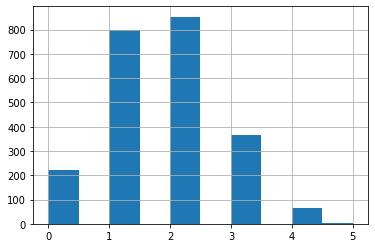

In [174]:
%%timeit
temp = words_df.copy()
# letters_retrieved = 
word_vector = temp.word.apply(lambda x: len(set("least").intersection(x)))
print(np.mean(word_vector))
word_vector.hist()

0.4582070160242529


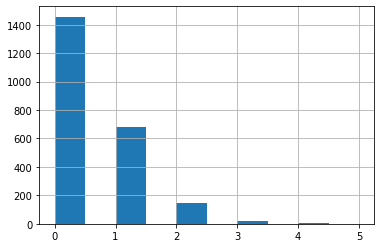

In [181]:
# %%timeit

temp = words_df.copy()
# letters_retrieved = 
guess_word = "least"
positions_vector = temp.word.apply(lambda x: sum([1 if x[i] == guess_word[i] else 0 for i in range(5) ]))
print(np.mean(positions_vector))
positions_vector.hist()

0.6201818969250757


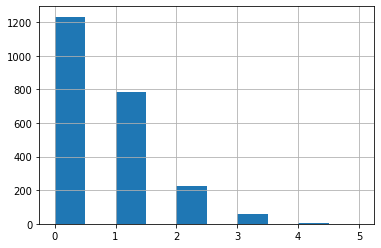

In [182]:
# %%timeit

temp = words_df.copy()
# letters_retrieved = 
guess_word = "slate"
positions_vector = temp.word.apply(lambda x: sum([1 if x[i] == guess_word[i] else 0 for i in range(5) ]))
print(np.mean(positions_vector))
positions_vector.hist()

In [191]:
def score_first_guess(guess_word, toPrint=False):
    temp = words_df.copy()
    # letters_retrieved = 
    word_vector = temp.word.apply(lambda x: len(set(guess_word).intersection(x)))
    positions_vector = temp.word.apply(lambda x: sum([1 if x[i] == guess_word[i] else 0 for i in range(5) ]))
    if toPrint:
        print("Average letters retrieved: ", np.mean(word_vector),
              "Average correct number of positions: ", np.mean(positions_vector)
             )
    return (np.mean(word_vector), np.mean(positions_vector))
    
#     print(np.mean(positions_vector))
#     positions_vector.hist()

In [192]:
temp['FirstGuessScore'] = temp.word.apply(lambda x: sum(score_first_guess(x)))
temp = temp.sort_values(by='FirstGuessScore', ascending = 'True')
temp.head()

,word,Letter1,Letter2,Letter3,Letter4,Letter5,FirstGuessScore,FirstGuessScores,LettersRetrieved
251,vivid,v,i,v,i,d,0.750541,"(1.6838458207016025, 0.24642702468601127)",1.683846
2131,mamma,m,a,m,m,a,0.782590,"(1.6838458207016025, 0.2611520138588133)",1.683846
1643,fuzzy,f,u,z,z,y,0.791685,"(1.6838458207016025, 0.3096578605456908)",1.683846
387,fluff,f,l,u,f,f,0.809008,"(1.6838458207016025, 0.2429623213512343)",1.683846
96,civic,c,i,v,i,c,0.812906,"(1.6838458207016025, 0.27587700303161544)",1.683846


In [193]:
temp.tail()

,word,Letter1,Letter2,Letter3,Letter4,Letter5,FirstGuessScore,FirstGuessScores,LettersRetrieved
872,slate,s,l,a,t,e,2.304028,"(1.6838458207016025, 0.6201818969250757)",1.683846
554,arise,a,r,i,s,e,2.305327,"(1.6838458207016025, 0.5482893027284539)",1.683846
1662,raise,r,a,i,s,e,2.306193,"(1.6838458207016025, 0.5491554785621481)",1.683846
1246,arose,a,r,o,s,e,2.306626,"(1.6838458207016025, 0.5383282806409702)",1.683846
909,stare,s,t,a,r,e,2.337809,"(1.6838458207016025, 0.5716760502381983)",1.683846


In [194]:
temp['FirstGuessScores'] = temp.word.apply(score_first_guess)

In [195]:
temp.tail()

,word,Letter1,Letter2,Letter3,Letter4,Letter5,FirstGuessScore,FirstGuessScores,LettersRetrieved
872,slate,s,l,a,t,e,2.304028,"(1.6838458207016025, 0.6201818969250757)",1.683846
554,arise,a,r,i,s,e,2.305327,"(1.7570376786487656, 0.5482893027284539)",1.683846
1662,raise,r,a,i,s,e,2.306193,"(1.7570376786487656, 0.5491554785621481)",1.683846
1246,arose,a,r,o,s,e,2.306626,"(1.7682979644867909, 0.5383282806409702)",1.683846
909,stare,s,t,a,r,e,2.337809,"(1.7661325249025552, 0.5716760502381983)",1.683846


In [196]:
temp['LettersRetrieved'] = temp['FirstGuessScores'].apply(lambda x: x[0])
temp = temp.sort_values(by='LettersRetrieved', ascending=False)
temp.head()

,word,Letter1,Letter2,Letter3,Letter4,Letter5,FirstGuessScore,FirstGuessScores,LettersRetrieved
866,irate,i,r,a,t,e,2.284539,"(1.7786920744911217, 0.5058466868774362)",1.778692
867,later,l,a,t,e,r,2.225206,"(1.7782589865742746, 0.4469467301862278)",1.778259
1557,alert,a,l,e,r,t,2.176700,"(1.7782589865742746, 0.39844088349935036)",1.778259
1502,alter,a,l,t,e,r,2.203118,"(1.7782589865742746, 0.42485924642702466)",1.778259
1246,arose,a,r,o,s,e,2.306626,"(1.7682979644867909, 0.5383282806409702)",1.768298


In [197]:
temp.tail()

,word,Letter1,Letter2,Letter3,Letter4,Letter5,FirstGuessScore,FirstGuessScores,LettersRetrieved
1203,puppy,p,u,p,p,y,0.872239,"(0.527067994802945, 0.3451710697271546)",0.527068
2131,mamma,m,a,m,m,a,0.782590,"(0.5214378518839324, 0.2611520138588133)",0.521438
508,mummy,m,u,m,m,y,0.846687,"(0.5067128627111304, 0.33997401472498917)",0.506713
251,vivid,v,i,v,i,d,0.750541,"(0.5041143352100477, 0.24642702468601127)",0.504114
1643,fuzzy,f,u,z,z,y,0.791685,"(0.4820268514508445, 0.3096578605456908)",0.482027


In [198]:
temp.LettersRetrieved.value_counts(normalize=True)

1.217843    0.003032
1.175401    0.003032
1.601992    0.003032
1.304028    0.002599
1.174101    0.002599
              ...   
1.228670    0.000433
1.227804    0.000433
1.225639    0.000433
1.220875    0.000433
0.482027    0.000433
Name: LettersRetrieved, Length: 1274, dtype: float64

1.7570376786487656


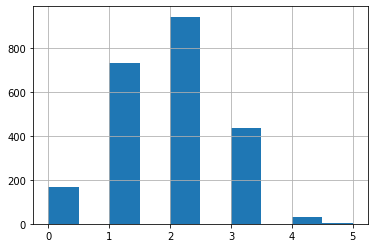

In [172]:
temp = words_df.copy()
# letters_retrieved = 
word_vector = temp.word.apply(lambda x: len(set("arise").intersection(x)))
print(np.mean(word_vector))
word_vector.hist()

1.6838458207016025


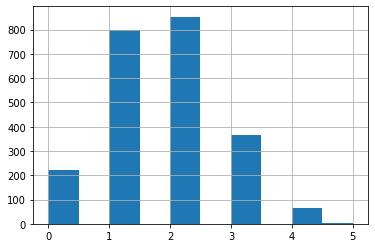

In [173]:
temp = words_df.copy()
# letters_retrieved = 
word_vector = temp.word.apply(lambda x: len(set("slate").intersection(x)))
print(np.mean(word_vector))
word_vector.hist()

In [ ]:
temp = words_df.copy()
# letters_retrieved = 
word_vector = temp.word.apply(lambda x: len(set("slate").intersection(x)))
print(np.mean(word_vector))
word_vector.hist()

## 10/25/2022

In [2]:
temp = words_df.copy()
print(len(temp))

NameError: name 'words_df' is not defined

In [1]:
temp = temp[(~temp.word.str.contains('l'))
                & (~temp.word.str.contains('e'))
                & (~temp.word.str.contains ('a'))
                & (~temp.word.str.contains('s'))
                & (~temp.word.str.contains( 't'))
                & (temp['Letter1'] != 'l')
                & (temp['Letter2'] != 'e')
                & (temp['Letter3'] != 'a')
                & (temp['Letter4'] != 's')
                & (temp['Letter5'] != 't')]
print(len(temp))
# temp

NameError: name 'temp' is not defined